In [1]:
import tensorflow as tf

a = tf.Variable(1, name='a')
b = tf.Variable(2, name='b')

tf.print('The sum of a and b is ', a + b)

The sum of a and b is  3


In [2]:
# Prepare MNIST data
import numpy as np
from tensorflow.keras.datasets import mnist

num_classes = 10
num_features = 784

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train/255, x_test/255

The number is ::  0


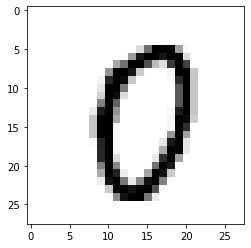

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def display_number(num):
    label = y_train[num]
    image = x_train[num].reshape([28,28])
    print('The number is :: ', label)
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
display_number(1000)

In [4]:
x_train[0].shape

(784,)

In [5]:
images = x_train[0].reshape([1,784])
images.shape

(1, 784)

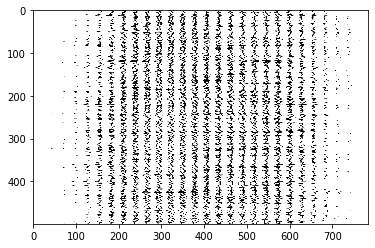

In [6]:
for i in range(1, 500):
    images = np.concatenate((images, x_train[i].reshape([1, 784])))
plt.imshow(images, cmap=plt.get_cmap('gray_r'))
plt.show()

In [7]:
learning_rate = 0.001
training_steps = 2000
batch_size = 250
display_step = 100

n_hidden = 128

In [8]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(60000).batch(batch_size).prefetch(1)

In [9]:
random_normal = tf.initializers.RandomNormal()
weights = {
    'h': tf.Variable(random_normal([num_features, n_hidden])),
    'h2': tf.Variable(random_normal([n_hidden, n_hidden])),
    'out': tf.Variable(random_normal([n_hidden, num_classes]))    
}
biases = {
    'b': tf.Variable(tf.zeros([n_hidden])),
    'b2': tf.Variable(tf.zeros([n_hidden])),
    'out': tf.Variable(tf.zeros([num_classes])),
}

In [10]:
def neural_net(input_data):
    hidden_layer = tf.add(tf.matmul(input_data, weights['h']), biases['b'])
    hidden_layer = tf.nn.sigmoid(hidden_layer)
    hidden_layer = tf.add(tf.matmul(hidden_layer, weights['h2']), biases['b2'])
    hidden_layer = tf.nn.sigmoid(hidden_layer)
    out_layer = tf.matmul(hidden_layer, weights['out']) + biases['out']
    return tf.nn.softmax(out_layer)

In [11]:
def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

In [12]:
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

In [13]:
optimizer = tf.keras.optimizers.SGD(learning_rate)

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = cross_entropy(pred, y)
    trainable_variables = list(weights.values()) + list(biases.values())
    gradients = g.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [14]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)
    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("Training epoch: %i, loss: %f, Accuracy: %f" % (step,loss,acc))

Training epoch: 100, loss: 561.355713, Accuracy: 0.336000
Training epoch: 200, loss: 489.670319, Accuracy: 0.540000
Training epoch: 300, loss: 298.268646, Accuracy: 0.620000
Training epoch: 400, loss: 211.261444, Accuracy: 0.764000
Training epoch: 500, loss: 174.859161, Accuracy: 0.804000
Training epoch: 600, loss: 127.371094, Accuracy: 0.840000
Training epoch: 700, loss: 122.344086, Accuracy: 0.836000
Training epoch: 800, loss: 111.354546, Accuracy: 0.876000
Training epoch: 900, loss: 111.378563, Accuracy: 0.880000
Training epoch: 1000, loss: 90.824814, Accuracy: 0.920000
Training epoch: 1100, loss: 72.812561, Accuracy: 0.904000
Training epoch: 1200, loss: 78.975143, Accuracy: 0.908000
Training epoch: 1300, loss: 97.633331, Accuracy: 0.896000
Training epoch: 1400, loss: 76.028244, Accuracy: 0.904000
Training epoch: 1500, loss: 62.191734, Accuracy: 0.928000
Training epoch: 1600, loss: 74.193275, Accuracy: 0.924000
Training epoch: 1700, loss: 100.728249, Accuracy: 0.880000
Training epoc

In [15]:
pred = neural_net(x_test)
print('Test Accuracy %f' % accuracy(pred, y_test))

Test Accuracy 0.914600


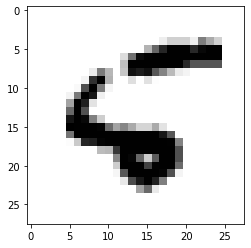

Original labels 5
Model prediction 6


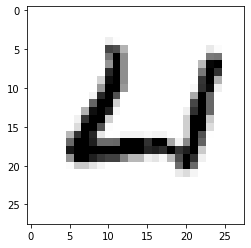

Original labels 4
Model prediction 6


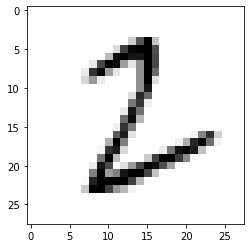

Original labels 2
Model prediction 3


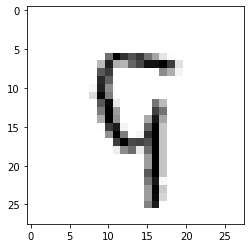

Original labels 9
Model prediction 4


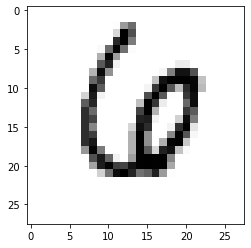

Original labels 6
Model prediction 2


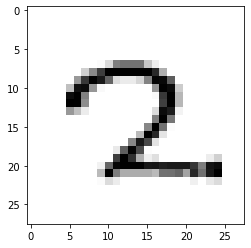

Original labels 2
Model prediction 7


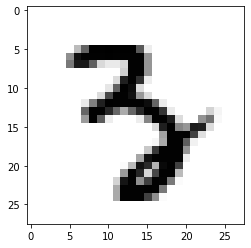

Original labels 3
Model prediction 5


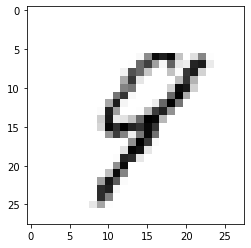

Original labels 9
Model prediction 4


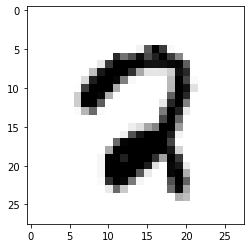

Original labels 2
Model prediction 8


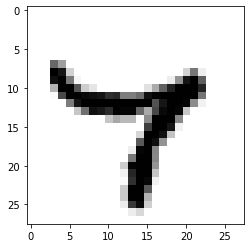

Original labels 7
Model prediction 9


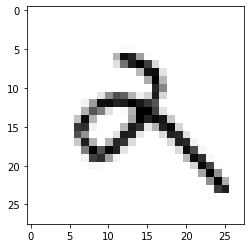

Original labels 2
Model prediction 9


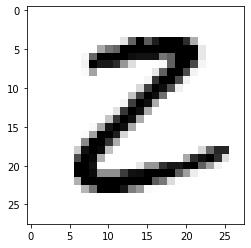

Original labels 2
Model prediction 3


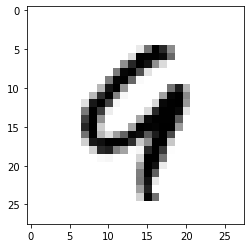

Original labels 9
Model prediction 4


In [16]:
n_images = 200
test_images = x_test[:n_images]
test_labels = y_test[:n_images]
predictions = neural_net(test_images)

for i in range(n_images):
    model_prediction = np.argmax(predictions.numpy()[i])
    if (model_prediction != test_labels[i]):
        plt.imshow(np.reshape(test_images[i], [28,28]), cmap='gray_r')
        plt.show()
        print('Original labels %i' % test_labels[i])
        print('Model prediction %i' % model_prediction)